# COGS 108 - EDA Checkpoint

# Names

- Arushri Girish
- Ronaldo Garcia-hernandez
- Matthew Bernard
- Daisy Ye
- Jocelyn Quiroz

<a id='research_question'></a>
# Research Question

Was there a significant correlation between the stream time and 1) the number of views and 2) followers which a streamer gained before and during the pandemic?

# Setup

In [1]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest


# read the dataset from absolute path from local storage
january2019Data = pd.read_csv('/Users/ronaldog/Documents/twitch2019/january2019Data.csv')
february2019Data = pd.read_csv('/Users/ronaldog/Documents/twitch2019/february2019Data.csv')
march2019Data = pd.read_csv('/Users/ronaldog/Documents/twitch2019/march2019Data.csv')
april2019Data = pd.read_csv('/Users/ronaldog/Documents/twitch2019/april2019Data.csv')
may2019Data = pd.read_csv('/Users/ronaldog/Documents/twitch2019/may2019Data.csv')
june2019Data = pd.read_csv('/Users/ronaldog/Documents/twitch2019/june2019Data.csv')
july2019Data = pd.read_csv('/Users/ronaldog/Documents/twitch2019/july2019Data.csv')
august2019Data = pd.read_csv('/Users/ronaldog/Documents/twitch2019/august2019Data.csv')
september2019Data = pd.read_csv('/Users/ronaldog/Documents/twitch2019/september2019Data.csv')
october2019Data = pd.read_csv('/Users/ronaldog/Documents/twitch2019/october2019Data.csv')
november2019Data = pd.read_csv('/Users/ronaldog/Documents/twitch2019/november2019Data.csv')
december2019Data = pd.read_csv('/Users/ronaldog/Documents/twitch2019/december2019Data.csv')
january2020Data = pd.read_csv('/Users/ronaldog/Documents/twitch2020/january2020Data.csv')
february2020Data = pd.read_csv('/Users/ronaldog/Documents/twitch2020/february2020.csv')
march2020Data = pd.read_csv('/Users/ronaldog/Documents/twitch2020/march2020Data.csv')
april2020Data = pd.read_csv('/Users/ronaldog/Documents/twitch2020/april2020Data.csv')
may2020Data = pd.read_csv('/Users/ronaldog/Documents/twitch2020/may2020Data.csv')
june2020Data = pd.read_csv('/Users/ronaldog/Documents/twitch2020/june2020Data.csv')
july2020Data = pd.read_csv('/Users/ronaldog/Documents/twitch2020/july2020Data.csv')
august2020Data = pd.read_csv('/Users/ronaldog/Documents/twitch2020/august2020Data.csv')
september2020Data = pd.read_csv('/Users/ronaldog/Documents/twitch2020/september2020Data.csv')
october2020Data = pd.read_csv('/Users/ronaldog/Documents/twitch2020/october2020Data.csv')
november2020Data = pd.read_csv('/Users/ronaldog/Documents/twitch2020/november2020Data.csv')
december2020Data = pd.read_csv('/Users/ronaldog/Documents/twitch2020/december2020Data.csv')


# creating a list with the above datasets, to create a new dataframe
twitch2019And2020Data = [january2019Data, 
                         february2019Data, 
                         march2019Data, 
                         april2019Data, 
                         may2019Data, 
                         june2019Data, 
                         july2019Data,
                         august2019Data, 
                         september2019Data, 
                         october2019Data, 
                         november2019Data,
                         december2019Data,
                         january2020Data, 
                         february2020Data, 
                         march2020Data, 
                         april2020Data, 
                         may2020Data, 
                         june2020Data, 
                         july2020Data,
                         august2020Data, 
                         september2020Data, 
                         october2020Data, 
                         november2020Data, 
                         december2020Data]

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
# drop columns that are non numerical and not necessary for our project
for i in range(len(twitch2019And2020Data)):
    
    twitch2019And2020Data[i] = twitch2019And2020Data[i].loc[:, ~twitch2019And2020Data[i].columns.str.contains('^Unnamed')]
    twitch2019And2020Data[i] = twitch2019And2020Data[i].drop(columns=['Partnered', 'Channel', 'Mature', 'Language', 'Peak viewers'])

In [3]:
for i in range(len(twitch2019And2020Data)):
    twitch2019And2020Data[i]['Followers gained'] = twitch2019And2020Data[i]['Followers gained']/twitch2019And2020Data[i]['Followers']*100
    twitch2019And2020Data[i] = twitch2019And2020Data[i].rename(columns={"Followers gained": "Followers gained percent"})

In [4]:
# calculate mean of each dataset and input into new data frame
meanOfTwitchData= []
for i in range(len(twitch2019And2020Data)):
    meanOfTwitchData.append(twitch2019And2020Data[i].mean())           

In [5]:
df = pd.DataFrame(data=meanOfTwitchData)  

# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

<AxesSubplot:>

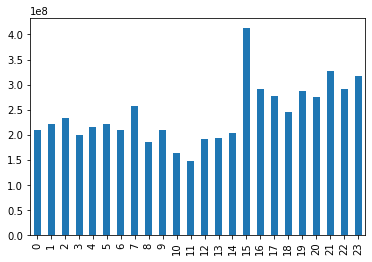

In [6]:
df['Watch time'].plot(kind='bar')

<AxesSubplot:>

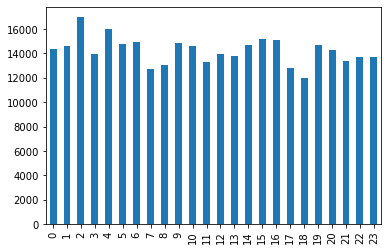

In [7]:
df['Stream time'].plot(kind='bar')

<AxesSubplot:>

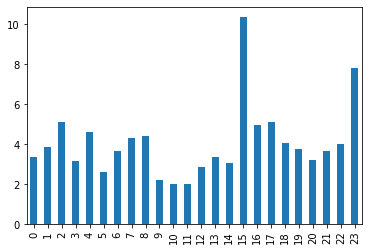

In [10]:
df['Followers gained percent'].plot(kind='bar')

<AxesSubplot:>

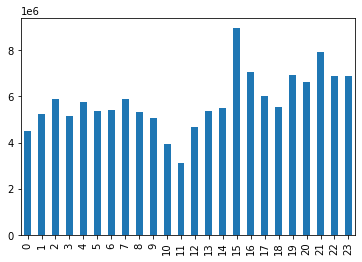

In [12]:
df['Views gained'].plot(kind='bar')

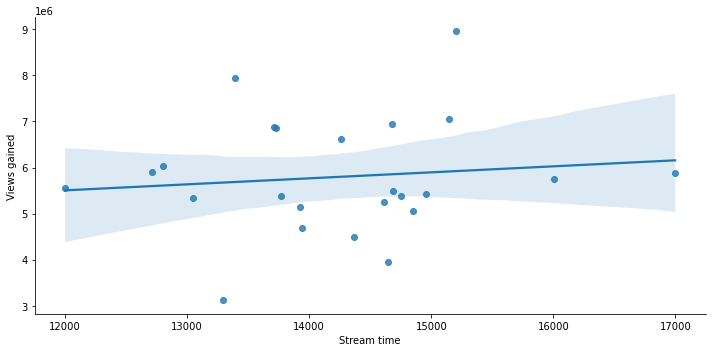

In [13]:
sns.lmplot(x="Stream time", y="Views gained", data=df, aspect=2)

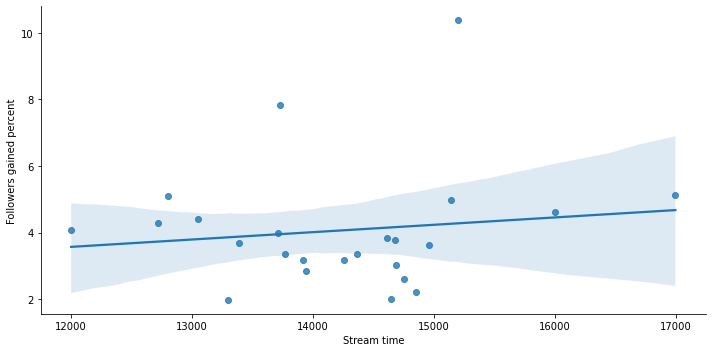

In [14]:
sns.lmplot(x="Stream time", y="Followers gained percent", data=df, aspect=2)

In [ ]:
sns.lmplot(x="Watch time", y="Followers gained", data=df, aspect=2)

In [ ]:
sns.lmplot(x="Watch time", y="Views gained", data=df, aspect=2)

In [ ]:
sns.heatmap(df.loc[:, ['Stream time', 'Watch time', 'Followers gained', 'Average viewers', 'Views gained']].corr(), annot=True, vmin=-1, vmax=1)